In [ ]:
#inspecting the certain demand type of job title over a 
# course of a year specifically for United State

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_us =df[df['job_country'] =='United States'].copy()

df_us['job_posted_month'] =df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

df_us_pivot.reset_index(inplace=True)

df_us_pivot['month_no']= pd.to_datetime(df_us_pivot['job_posted_month'],format='%B').dt.month

df_us_pivot.sort_values('month_no',inplace=True)
df_us_pivot.set_index('job_posted_month',inplace=True)
df_us_pivot.drop(columns='month_no',inplace=True)

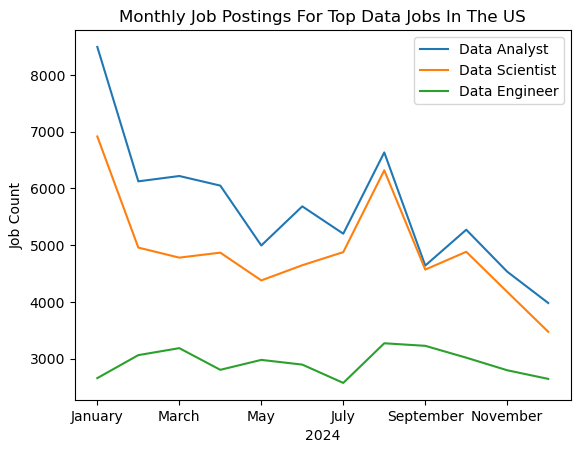

In [27]:

top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings For Top Data Jobs In The US')
plt.xlabel('2024')
plt.ylabel('Job Counts')
plt.legend()
plt.show()